In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import binascii

def text_to_bits(text, encoding='utf-8', errors='surrogatepass'):
    bits = bin(int.from_bytes(text.encode(encoding, errors), 'big'))[2:]
    return bits.zfill(8 * ((len(bits) + 7) // 8))

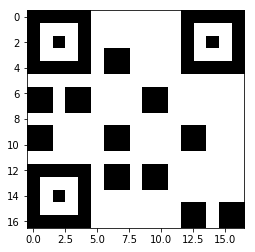

In [3]:
template_small = np.ones((17,17), dtype='uint8')*255

data = ['-', '*', 'ü']
data_bin = []

for i in data:
    s = text_to_bits(i)
    for c in s:
        if c == '1':
            data_bin.append(True)
        else:
            data_bin.append(False)

corner_coordinates = [(0,0), (12,0), (0,12)]

for i,j in corner_coordinates:
    template_small[i:i+5,j:j+5] = 0
    template_small[i+1:i+4,j+1:j+4] = 255
    template_small[i+2,j+2] = 0

data_coordinates = [               (0,6),  (0,9),
                                   (3,6),  (3,9),
                    (6,0), (6,3),  (6,6),  (6,9),  (6,12),  (6,15),
                    (9,0), (9,3),  (9,6),  (9,9),  (9,12),  (9,15),
                                   (12,6), (12,9), (12,12), (12,15),
                                   (15,6), (15,9), (15,12), (15,15) ]

for i,b in zip(data_coordinates, data_bin):
    if b:
        template_small[i[0]:i[0]+2,i[1]:i[1]+2] = 0

plt.imshow(template_small, cmap='gray')

In [4]:
template = cv2.resize(template_small, (1190,1190), interpolation=cv2.INTER_AREA)
cv2.imwrite('QR_Code.bmp', template)

True